In [40]:
import os
from pprint import pprint

from msl.equipment import EquipmentRecord, ConnectionRecord, Backend

from msl.equipment.resources.thorlabs import MotionControl
# ensure that the Kinesis folder is available on PATH
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Thorlabs/Kinesis'

print('Building the device list...')
MotionControl.build_device_list()

n_devices = MotionControl.get_device_list_size()
if n_devices == 0:
    print('There are no devices in the device list')
    
elif n_devices == 1:
    print('There is 1 device in the device list')
else:
    print('There are {} devices in the device list'.format(n_devices))

all_devices = MotionControl.get_device_list()
print('The serial numbers of all the devices are: {}'.format(all_devices))

 #rather than reading the EquipmentRecord from a database we can create it manually
record = EquipmentRecord(
    manufacturer='Thorlabs',
    model='KST101',
    serial='26001683',  # update the serial number for your KST101
    connection=ConnectionRecord(
        backend=Backend.MSL,
        address='SDK::Thorlabs.MotionControl.KCube.StepperMotor.dll',
    ),
)
record2 = EquipmentRecord(
    manufacturer='Thorlabs',
    model='KST101',
    serial='26001718',  # update the serial number for your KST101
    connection=ConnectionRecord(
    backend=Backend.MSL,
    address='SDK::Thorlabs.MotionControl.KCube.StepperMotor.dll',
),
)

Building the device list...
There are 2 devices in the device list
The serial numbers of all the devices are: ['26001683', '26001718']


In [41]:
def wait(value,motor):
        motor.clear_message_queue()
        message_type, message_id, _ = motor.wait_for_message()
        while message_type != 2 or message_id != value:
            position = motor.get_position()
            real = motor.get_real_value_from_device_unit(position, 'DISTANCE')
            print('  at position {} [device units] {} [real-world units]'.format(position, real))
            message_type, message_id, _ = motor.wait_for_message()

In [42]:
motorx = record.connect()
print('Connected to {}'.format(motorx))
motory = record2.connect()
print('Connected to {}'.format(motory))
# connect to the KCube Stepper Motor

Connected to KCubeStepperMotor<Thorlabs|KST101|26001683>
Connected to KCubeStepperMotor<Thorlabs|KST101|26001718>


In [43]:
  # load the configuration settings (so that we can use the get_real_value_from_device_unit() method)
motory.load_settings()

In [44]:
motorx.load_settings()

In [ ]:
#motorx.set_motor_params_ext(24,41,1.00329)
#motory.set_motor_params_ext(24,41,1.00329)

In [27]:
 # start polling at 200 ms
motorx.start_polling(200)
motory.start_polling(200)

In [117]:
# home the device
print('Homing...')
motorx.set_homing_velocity(5392*10000)
motorx.home()

Homing...


In [52]:
print('Homing...')
motory.set_homing_velocity(5392*10000)
motory.home()

Homing...


In [47]:
def move_to_x_y_position(x,y):
    motorx.move_to_position(motorx.get_device_unit_from_real_value(x,0))
    motory.move_to_position(motory.get_device_unit_from_real_value(y,0))

In [48]:
move_to_x_y_position(10,10)

In [33]:
motorx.get_vel_params()

(107837160, 11049)

In [ ]:
motory.get_vel_params()

In [34]:
motorx.stop_polling()
motory.stop_polling()


In [ ]:
motorx.set_vel_params(125540,1)
motory.set_vel_params(125540,1)

In [158]:
motory.disconnect()
motorx.disconnect()

In [157]:
motorx.move_to_position(10043118)

In [151]:
motorx.get_real_value_from_device_unit(motorx.get_position(),0)

0.0049785

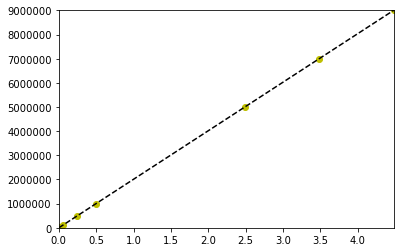

In [123]:
import numpy as np
import matplotlib.pyplot as plt

y = [0,500,1000,2500,5000,10000,20000,50000,100000,500000,1000000,5000000,7000000,9000000] #mm
x = [0,0.0002489,0.0004979,0.0012446,0.0024893,0.0049785,0.0099571,0.0248927,0.0497853,0.2489267,0.4978533,2.4892667,3.4849734,4.4806801] #device units

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(0, x[-1])
plt.ylim(0, y[-1])
plt.show()

In [124]:
m,b= np.polyfit(x,y,1)

In [125]:
m

2008623.651917194

In [126]:
b

7.4189049903691962e-06

In [146]:
def from_device_units_to_mm(device_units):
    return float('%.7f'%(4.9785334303194085e-07*device_units - 3.6926158834568621e-12))

def from_mm_to_device_units(mm):
    return int(2008623.651917194*mm + 7.4189049903691962e-06)


In [152]:
a = from_device_units_to_mm(10000)

In [156]:
from_mm_to_device_units(5)

10043118

1.00248927